# Titanic - Machine Learning from Disaster

> Kaggle beginner competetion

Some useful information about the information available in the datasets:
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

*Variable Notes*
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Loading Training Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_train = pd.read_csv("/Users/daniel/Documents/Experimentation-DataScienceProjects/Titanic/titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Loading Test Dataset

In [2]:
df_test = pd.read_csv("/Users/daniel/Documents/Experimentation-DataScienceProjects/Titanic/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Shape of the training and test datasets
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


## Data Preprocessing

### Imputing Missing Data

In [4]:
len(df_train)
#Missing values training dataset
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#percentage of missing values for each column
df_train.isna().sum()/len(df_train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

At this point it was identified that in the training dataset, 77% of the cabin feature has missing values, whereas around 19% of age is missing. Honestly, I don't think the cabin has great added value for this exercise, so I decided to apply two different techniques:
* Drop the column Cabin, Ticket and Name
* Replace the missing values in Age. In Age, the functional interpolate() is used

In [6]:
del df_train['Cabin']
del df_train['Ticket']
del df_train['Name']
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
#Checking the feature types
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [8]:
#Interpolate on feature Age
df_train['Age'] = df_train['Age'].interpolate(method='linear',limit_direction='forward')

df_train.dropna(subset=['Embarked'],axis=0,inplace=True)

#Now we check if there are still missing values
df_train.isna().sum()/len(df_train)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

Great!!! No more missing values!

## Outliers Detection and Treatment

In [9]:
#Tutorial: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

#Identifying Outliers with Skewness - Variable Age
print('Skew: %3f' % df_train['Age'].skew())
df_train['Age'].describe() 

Skew: 0.363861


count    889.000000
mean      29.680450
std       13.872944
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
#Identifying Outliers with Skewness - Variable Fare
print('Skew: %3f' % df_train['Fare'].skew())
df_train['Fare'].describe() 

Skew: 4.801440


count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

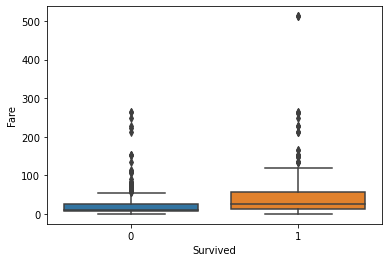

In [11]:
sns.boxplot(x='Survived',y='Fare',data=df_train)

Finally, Age is not a good variable to apply outlier treatment (see that the max value is 80, which is ok). Whereas, the skewness value of 4.8 seen in "Fare" shows that has a right-skewed distribution, indicating the presence of extreme higher values. The maximum 'Fare' value of 512,3292 proves this point.

In [12]:
#Replacing Outliers with Median Values
MedianFare = df_train['Fare'].quantile(0.50)
print(MedianFare) #Median value
#Output: 14,45
df_train.loc[df_train.Fare>512, 'Fare'] = MedianFare

print('Values after outlier treatment: ')
df_train['Fare'].describe()

14.4542
Values after outlier treatment: 


count    889.000000
mean      30.416563
std       41.096652
min        0.000000
25%        7.895800
50%       14.454200
75%       30.500000
max      263.000000
Name: Fare, dtype: float64

## Data Transformation

Let's now transform some of the features:
* "Sex" 
* "Embarked"
* "Age" -> transform into bins first and, then, encode
* "Fare" -> transform into bins first and, then, encode

The decision to group Age and Fare into bins is to ensure a better model prediction and to avoid over-fitting

In [13]:
#Option 1:
#df_train['Sex'] = df_train['Sex'].astype('category').cat.codes
#df_train['Embarked'] = df_train['Embarked'].astype('category').cat.codes

#Option 2 (which I decided to use because it clearly express the values that is transformed):
df_train['Sex'] = df_train['Sex'].map({'female':1,'male':2}).astype('int')
df_train['Embarked'] = df_train['Embarked'].map({'S':0,'C':1,'Q':2}).astype('int')

df_train['Age'] = pd.qcut(df_train['Age'],5)#I think 5 bins is a good number
df_train['Fare'] = pd.qcut(df_train['Fare'],5) #as above

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,2,"(19.0, 26.0]",1,0,"(-0.001, 7.854]",0
1,2,1,1,1,"(31.5, 40.0]",1,0,"(39.6, 263.0]",1
2,3,1,3,1,"(19.0, 26.0]",0,0,"(7.854, 10.5]",0
3,4,1,1,1,"(31.5, 40.0]",1,0,"(39.6, 263.0]",0
4,5,0,3,2,"(31.5, 40.0]",0,0,"(7.854, 10.5]",0


<AxesSubplot:xlabel='Age', ylabel='Survived'>

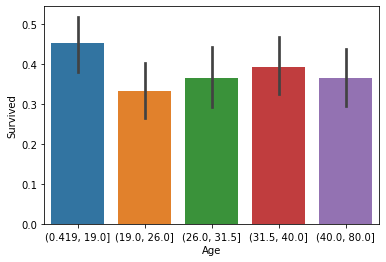

In [14]:
sns.barplot(x='Age',y='Survived',data=df_train)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

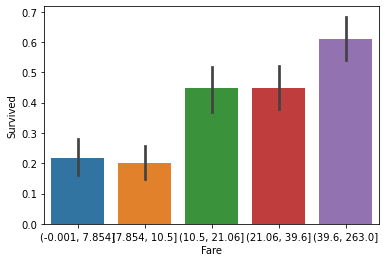

In [15]:
sns.barplot(x='Fare',y='Survived',data=df_train)

In [16]:
#Let's now use LabelEncoder(), from sklearn, to encode Age and Fare bins
df_train['Age'] = LabelEncoder().fit_transform(df_train['Age'])
df_train['Fare'] = LabelEncoder().fit_transform(df_train['Fare'])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,2,1,1,0,0,0
1,2,1,1,1,3,1,0,4,1
2,3,1,3,1,1,0,0,1,0
3,4,1,1,1,3,1,0,4,0
4,5,0,3,2,3,0,0,1,0


## Feature Selection
1. Univariate Selection

Another task I want to perform, and considered one of the initial and important tasks in any machine learning project, is the Feature Selection. Here I will use the Univariate Selection.
Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Only numeric variables
x = df_train.iloc[:,2:9]
y = df_train.iloc[:,[1]]

#apply SelectKBest class to extract top 7 best features
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print 7 best features

   Features      Score
5      Fare  81.422494
1       Sex  36.018826
0    Pclass  30.135266
6  Embarked  11.716463
4     Parch  10.448598
3     SibSp   2.391188
2       Age   1.227381


Selected features to be used:
* Fare
* Sex
* Pclass

In [24]:
SelectedFeatures = ['Fare','Sex','Pclass']

# Models

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn import metrics

target = 'Survived'
X_train = df_train[SelectedFeatures]
y_train = df_train[target]

# Logistic Regression

In [20]:
import numpy as np

model=LogisticRegression()
grid_param_log={
    'C':np.logspace(-3,3,7),
    'penalty':['l1','l2','none'],
    'max_iter':[50,100,150]
}
gd_sr_lr=GridSearchCV(estimator=model,param_grid=grid_param_log,scoring='accuracy',cv=10,n_jobs=-1)
gd_sr_lr.fit(X_train,y_train)

best_parameters = gd_sr_lr.best_params_
print(best_parameters)


{'C': 0.001, 'max_iter': 50, 'penalty': 'none'}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [25]:
model_lr = LogisticRegression(C=0.001,max_iter=50,penalty='none')
accuracy = cross_val_score(model_lr, X_train, y_train, cv=10,scoring='accuracy')
print (accuracy)
print('Average accuracy: {}'.format(accuracy.mean())) 

[0.80898876 0.7752809  0.75280899 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76136364]
Average accuracy: 0.7828779366700716


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalt

# Random Forest

In [22]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
grid_param = {
 'n_estimators': [100, 200, 300],
 'criterion':['gini', 'entropy'],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5,10],
 'bootstrap': [True, False]
}

gd_sr = GridSearchCV(estimator=model,
 param_grid=grid_param,
 scoring='accuracy',
 cv=10,
 n_jobs=-1, #-1 means using all processors
 refit = True)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [29]:
rfc=RandomForestClassifier(n_estimators=100, bootstrap=True,criterion='gini',min_samples_leaf=1,min_samples_split=2)

accuracyRFC = cross_val_score(rfc, X_train, y_train, cv=10,scoring='accuracy')
print (accuracyRFC)
print('Average accuracy: {}'.format(accuracyRFC.mean()))

[0.7752809  0.82022472 0.7752809  0.85393258 0.85393258 0.80898876
 0.80898876 0.79775281 0.86516854 0.79545455]
Average accuracy: 0.8155005107252297


## Tuning Hyperparameters for Random Forest

In [25]:
#Must-read references:
#https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 5)] 
#linspace returns evenly numbers in the interval. In this case, 5 in 5
#https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.1min finished


{'n_estimators': 2000, 'max_features': 'auto', 'max_depth': 260}


In [39]:
rfc_model_hp = RandomForestClassifier(n_estimators= 2000, max_features= 'auto', max_depth= 260)

accuracyRFC_Hp = cross_val_score(rfc_model_hp, X_train, y_train, cv=10,scoring='accuracy')
print (accuracyRFC_Hp)
print('Average accuracy: {}'.format(accuracyRFC_Hp.mean()))

[0.7752809  0.82022472 0.7752809  0.85393258 0.85393258 0.80898876
 0.80898876 0.79775281 0.86516854 0.79545455]
Average accuracy: 0.8155005107252297


# SVM (Support Vector Machine)

In [29]:
from sklearn.svm import SVC

model_svm = SVC()
grid_param_svc = {
    'C':[0.5,1.0,1.5,2.0,2,5,3.0], #Cost
}

gd_sr_svm = GridSearchCV(estimator=model_svm,
 param_grid=grid_param_svc,
 scoring='accuracy',
 cv=10,
 n_jobs=-1) #-1 means using all processors

gd_sr_svm.fit(X_train, y_train)

best_parameters_svm = gd_sr_svm.best_params_
print(best_parameters_svm)


{'C': 2.0}


In [35]:
svm=SVC(C=2.0, kernel='linear')

accuracySVC = cross_val_score(svm, X_train, y_train, cv=10,scoring='accuracy')
print (accuracySVC)
print('Average accuracy: {}'.format(accuracySVC.mean()))

[0.80898876 0.79775281 0.76404494 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76136364]
Average accuracy: 0.7862487231869254


Through the usage of the accuracy metric, it is possible to see that the Random Forest Classifier model had the best result.

# Preparing the Test Data

In [30]:
#Missing values training dataset
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
del df_test['Cabin']
del df_test['Ticket']
del df_test['Name']

df_test['Age'] = df_test['Age'].interpolate(method='linear',limit_direction='forward')

#Now we check if there are still missing values
df_train.isna().sum()/len(df_train)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [32]:
#Identifying Outliers with Skewness - Variable Age
print('Skew: %3f' % df_test['Age'].skew())
df_test['Age'].describe() 

Skew: 0.452445


count    418.000000
mean      30.045251
std       13.502708
min        0.170000
25%       21.500000
50%       27.700000
75%       38.875000
max       76.000000
Name: Age, dtype: float64

In [33]:
print('Skew: %3f' % df_test['Fare'].skew())
print(df_test['Fare'].describe())

Skew: 3.687213
count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


In [34]:
#Replacing Outliers with Median Values
MedianFare = df_test['Fare'].quantile(0.50)
print(MedianFare) #Median value
#Output: 14,45
df_test.loc[df_test.Fare>512, 'Fare'] = MedianFare

print('Values after outlier treatment: ')
df_test['Fare'].describe()

14.4542
Values after outlier treatment: 


count    417.000000
mean      34.433244
std       50.784291
min        0.000000
25%        7.895800
50%       14.454200
75%       31.387500
max      263.000000
Name: Fare, dtype: float64

In [35]:
df_test['Sex'] = df_test['Sex'].map({'female':1,'male':2}).astype('int')
df_test['Embarked'] = df_test['Embarked'].map({'S':0,'C':1,'Q':2}).astype('int')

df_test['Age'] = pd.qcut(df_test['Age'],5)#I think 5 bins is a good number
df_test['Fare'] = pd.qcut(df_test['Fare'],5) #as above

In [36]:
df_test['Age'] = LabelEncoder().fit_transform(df_test['Age'])

df_test['Fare'] = df_test['Fare'].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))
df_test['Fare'] = LabelEncoder().fit_transform(df_test['Fare'])

In [37]:
print(df_test['Fare'].dtypes)
df_test.head(10)

int64


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,2,3,0,0,4,2
1,893,3,1,4,1,0,0,0
2,894,2,2,4,0,0,4,2
3,895,3,2,2,0,0,4,0
4,896,3,1,1,1,1,1,0
5,897,3,2,0,0,0,4,0
6,898,3,1,2,0,0,0,2
7,899,2,2,2,1,1,2,0
8,900,3,1,0,0,0,0,1
9,901,3,2,1,2,0,2,0


In [40]:
#Predict Survived
X_test = df_test[SelectedFeatures]

#Fit the model
rfc_model_hp.fit(X_train,y_train)
#Predicting Survived
y_test = rfc_model_hp.predict(X_test)

#Save and download output file
output_file = pd.DataFrame({
    'PassengerId':df_test['PassengerId'],
    'Survived':y_test.astype(int)
})

output_file.to_csv('output_file.csv',index=False)

*Wrapping up*, that was a really good exercise, especially to get back in touch with all the concepts.
The score at Kaggle was not the best, I scored 0.75598, however the experience was definitely amazing!

# Creating Web App using Gradio

**References**
* https://towardsdatascience.com/a-mathematical-explanation-of-support-vector-machines-e433ffe04362
* https://www.gradio.app/

In [48]:
import gradio as gd

rfc.fit(X_train,y_train)

#Creating a prediction function
def predict_survived(Fare,Sex,Pclass):
    df = pd.DataFrame.from_dict({'Fare':[Fare+1],     
                                  'Sex': [Sex+1],
                                 'Pclass': [Pclass+1]})
    predict = rfc.predict_proba(df)[0]
    result= {'Survival': predict[0],'No Survival':predict[1]}
    return result

#Prepare the fields in screen
#Fare = gd.inputs.Slider(minimum=1, maximum=5, default=1, step=1, label="Fare")
Fare = gd.inputs.Radio(choices=['0 - 7.8','7.8 - 10.5','10.5 - 21','21 - 39.6','39.6 - 263'], 
                       type='index',
                       label="Passenger Fare($)")
#Sex = gd.inputs.Slider(minimum=1, maximum=2, default=1, step=1, label="Sex")
Sex = gd.inputs.Radio(choices=['Female','Male'], type='index', label="Sex")
#Pclass = gd.inputs.Slider(minimum=1, maximum=3, default=1, step=1, label="Class")
Pclass = gd.inputs.Dropdown(choices=['First Class','Second Class','Third Class'], type='index', label="Passenger Class")

#declare the interface
interface = gd.Interface(fn=predict_survived, 
             inputs=[Fare,Sex,Pclass], 
             outputs="label",interpretation="default",
             live=True,
             title='Titanic - Machine Learning from Disaster',
             examples=[['10.5 - 21','Female','Second Class'],['39.6 - 263','Male','First Class']],
             verbose=False)

#launch the interface
interface.launch()

Running locally at: http://127.0.0.1:7867/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7867/', None)